Data Analysis

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
df=pd.read_csv('merged.csv')

In [33]:
#clean up the data 
data=df[['Image_vividness', 'age', 'response_time','cue_type', 'gender', 'participant_id']]
data.loc[:, 'Image_vividness'] = data['Image_vividness'].bfill()
data=data.dropna(subset='participant_id')

data

,Image_vividness,age,response_time,cue_type,gender,participant_id
0,2.0,23.0,0.357192,no_cue,f,1.0
1,2.0,23.0,0.635730,mental_cue,f,1.0
2,2.0,23.0,1.243764,mental_cue,f,1.0
3,2.0,23.0,1.405153,mental_cue,f,1.0
4,2.0,23.0,0.326765,visual_cue,f,1.0
...,...,...,...,...,...,...
482,5.0,25.0,0.983961,no_cue,m,8.0
483,5.0,25.0,0.957305,no_cue,m,8.0
484,5.0,25.0,0.551135,mental_cue,m,8.0
485,5.0,25.0,1.165409,mental_cue,m,8.0


In [34]:
data[['Image_vividness', 'age', 'response_time']].describe()

,Image_vividness,age,response_time
count,480.00000,480.000000,480.000000
mean,3.37500,24.875000,1.112449
std,1.21962,1.054368,0.706723
min,2.00000,23.000000,0.295889
25%,2.00000,24.750000,0.735865
50%,3.50000,25.000000,0.956534
75%,4.25000,25.000000,1.304018
max,5.00000,27.000000,7.385785


In [47]:
participants_df = data[['participant_id', 'gender', 'age', 'Image_vividness']].drop_duplicates().reset_index()
participants_df

,index,participant_id,gender,age,Image_vividness
0,0,1.0,f,23.0,2.0
1,61,2.0,f,27.0,3.0
2,122,3.0,m,25.0,2.0
3,183,4.0,m,25.0,4.0
4,244,5.0,m,25.0,5.0
5,305,6.0,m,25.0,4.0
6,366,7.0,m,24.0,2.0
7,427,8.0,m,25.0,5.0


c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\zuzal\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

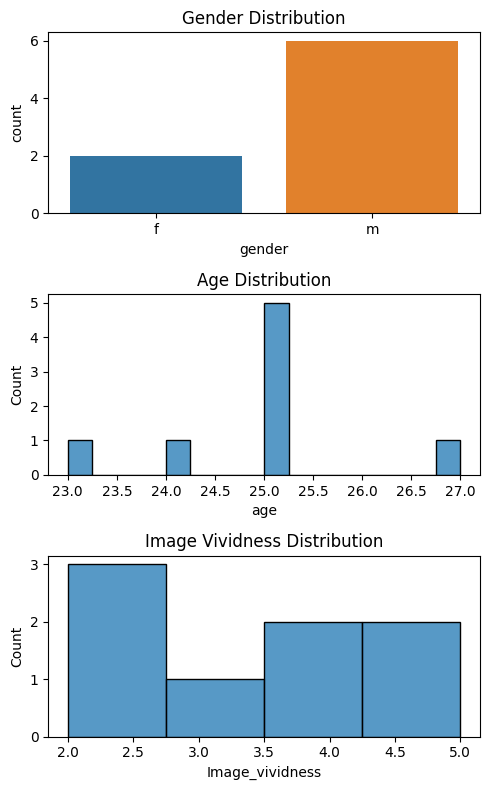

In [51]:

# Assuming 'df' is your DataFrame
fig, axs = plt.subplots(3, figsize=(5,8))

# Plot for 'gender' column
sns.countplot(x='gender', data=participants_df, ax=axs[0])
axs[0].set_title('Gender Distribution')

# Plot for 'age' column
sns.histplot(participants_df['age'], kde=False, ax=axs[1])
axs[1].set_title('Age Distribution')

# Plot for 'Image_vividness' column
sns.histplot(participants_df['Image_vividness'], kde=False, ax=axs[2])
axs[2].set_title('Image Vividness Distribution')

plt.tight_layout()
plt.show()


<Axes: >

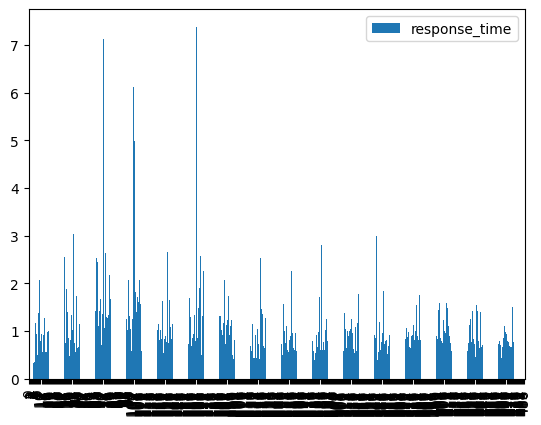

In [59]:
data[['response_time']].plot(kind='bar')

AttributeError: 'numpy.float64' object has no attribute 'plot'

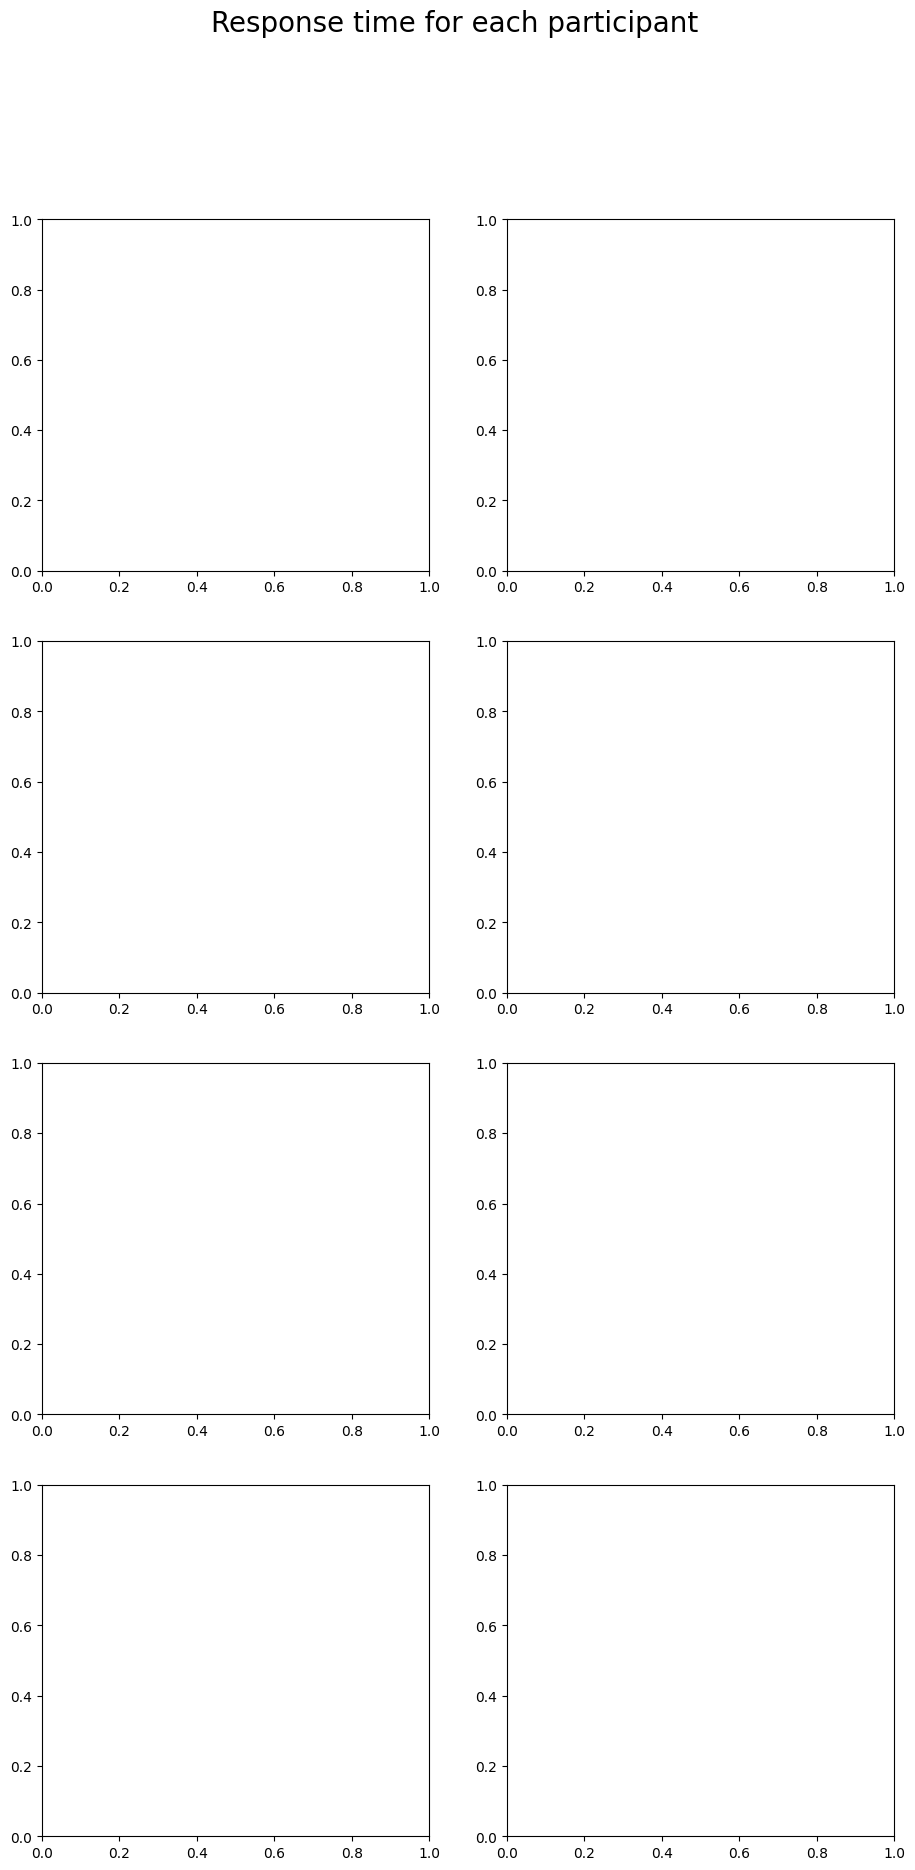

In [61]:
import math

fig, axes = plt.subplots(nrows=int(math.ceil(len(data['participant_id'].unique())/2)), ncols=2, figsize=(11, 21))
#flatten for easier indexing
axes = axes.ravel()
fig.suptitle('Response time for each participant',fontsize =20)


for i, participant in enumerate(data['participant_id'].unique()):
    # Get the group for the current 'Vejnavn'
    group = data.loc[participant]['response_time']

    # Create a new figure and plot the group as a bar plot
    ax = axes[i] 
    group.plot(kind='bar', ax=ax, color ='#F7E1FF', edgecolor ='#BE98CB', linewidth = 2,width = 0.5, legend=False)

    # Set the title and axis labels
    ax.set_title(f'Response time for {participant}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Daily average')
    #ax.tick_params(axis='both', which='both', length=0, pad=5, labelsize=10)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)

    #ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    ax.set_xticklabels(group.index, rotation=45)

    # Show the plot

plt.tight_layout()
plt.show()